TABLAS que necesitamos: 
- categoría
    - **categoria_id** → PK (primary key)
    - nombre 
- pieza 
    - **pieza_id** → PK 
    - nombre 
    - color 
    - precio 
    - *categoria_id* → FK (foreign key) → categoría
- proveedor
    - **proveedor_id** → PK
    - nombre 
    - direccion 
    - ciudad 
    - provincia 
- suministro (tabla puente)
    - proveedor_id → PK + FK
    - pieza_id → PK + FK
    - fecha → PK (distinto lote)
    - cantidad 


Código para crear la base de datos:

In [10]:
# importar librerías
import pandas as pd
import sqlite3

In [11]:
# haremos una conexión a una base de datos que en realidad no existe, pero esa es la forma de crearla
connection = sqlite3.connect("modelo_BD.db")

# creamos el cursor para poder interactuar con ella
cursor_gestion = connection.cursor()

In [13]:
# creamos las tablas
query = '''
CREATE TABLE categoria (
categoria_id INT PRIMARY KEY,
nombre TEXT NOT NULL
);

CREATE TABLE proveedor (
proveedor_id INT PRIMARY KEY,
nombre TEXT NOT NULL,
direccion TEXT,
ciudad TEXT,
provincia TEXT
);

CREATE TABLE pieza (
pieza_id INT PRIMARY KEY,
nombre TEXT NOT NULL,
color TEXT,
precio DECIMAL(10,2) NOT NULL,
categoria_id INT,
FOREIGN KEY (categoria_id) REFERENCES categoria(categoria_id)
);

CREATE TABLE suministro (
proveedor_id INT NOT NULL,
pieza_id INT NOT NULL,
fecha DATE NOT NULL,
cantidad INT NOT NULL,
PRIMARY KEY (proveedor_id, pieza_id, fecha),
FOREIGN KEY (proveedor_id) REFERENCES proveedor(proveedor_id),
FOREIGN KEY (pieza_id) REFERENCES pieza(pieza_id)
);
'''

# En lugar de execute() usamos executescript(),
# que permite ejecutar múltiples sentencias en un solo string
cursor_gestion.executescript(query)

In [34]:
# comprobamos que la tabla categoría se ha creado
query_categoria = '''
SELECT * 
FROM categoria'''

df_categoria = pd.read_sql(query_categoria, connection)
df_categoria

,categoria_id,nombre


In [33]:
# comprobamos que la tabla proveedor se ha creado
query_proveedor = '''
SELECT * 
FROM proveedor'''

df_proveedor = pd.read_sql(query_proveedor, connection)
df_proveedor

,proveedor_id,nombre,direccion,ciudad,provincia


In [32]:
# comprobamos que la tabla pieza se ha creado
query_pieza = '''
SELECT * 
FROM pieza'''

df_pieza = pd.read_sql(query_pieza, connection)
df_pieza

,pieza_id,nombre,color,precio,categoria_id


In [31]:
# comprobamos que la tabla suministro se ha creado
query_suministro = '''
SELECT * 
FROM suministro'''

df_suministro = pd.read_sql(query_suministro, connection)
df_suministro

,proveedor_id,pieza_id,fecha,cantidad


Diagrama entidad relación
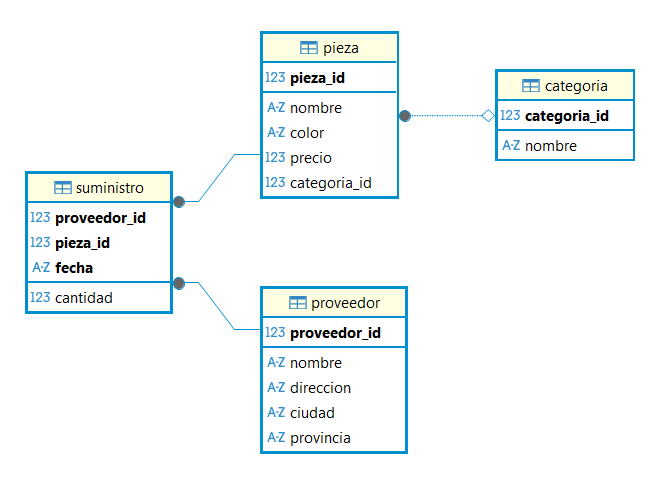